In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## 1. Load and inspect dataset

In [33]:
df = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df = df.drop(['Name','PassengerId','Ticket', 'Cabin'], axis = 1)
dftest = dftest.drop(['Name','PassengerId','Ticket', 'Cabin'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [36]:
df.shape

(891, 8)

In [37]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## 2.Visualize dataset

In [39]:
num = ['Age', 'Fare']
cat = ['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']
target ='Survived'


In [40]:
df[target].value_counts()

0    549
1    342
Name: Survived, dtype: int64

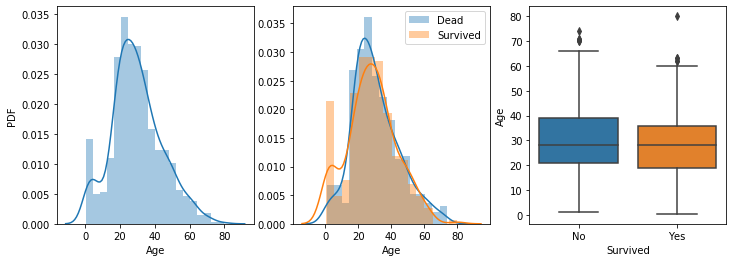

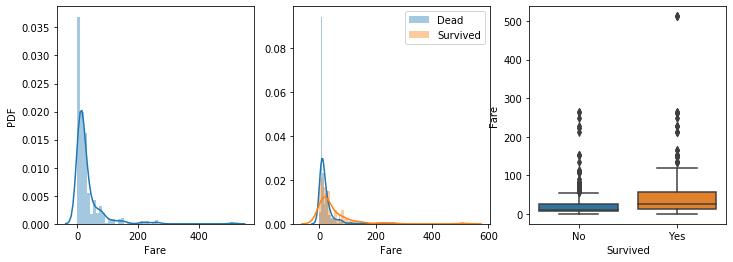

In [41]:
for col in num:
    temp = df[col].dropna()
    #print(temp)
    fig,(ax0,ax1,ax2) = plt.subplots(ncols = 3, figsize = (12,4))
    sns.distplot(temp, ax = ax0)
    ax0.set_ylabel('PDF')
    sns.distplot(temp[df.Survived == 0], label = 'Dead', ax = ax1)
    sns.distplot(temp[df.Survived == 1], label = 'Survived', ax = ax1)
    ax1.legend()
    sns.boxplot(x = df['Survived'], y = temp, ax = ax2)
    ax2.set_xticklabels(['No', 'Yes'])
    plt.show()

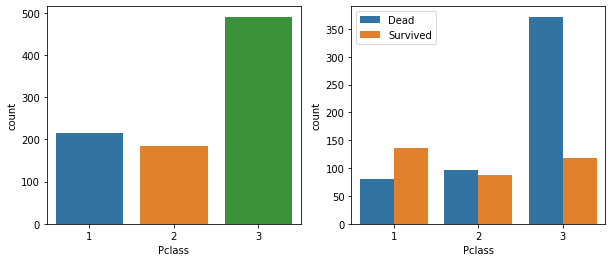

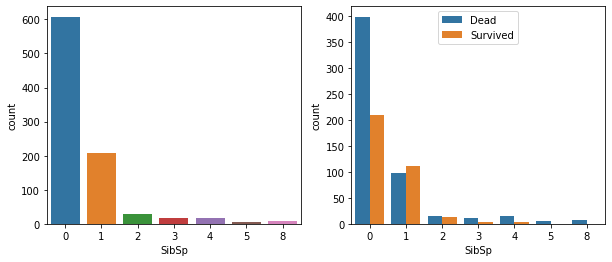

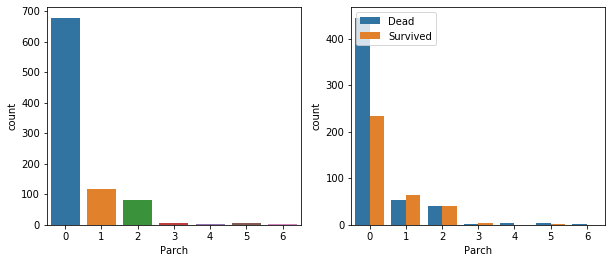

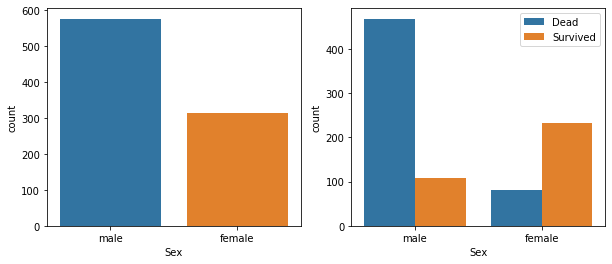

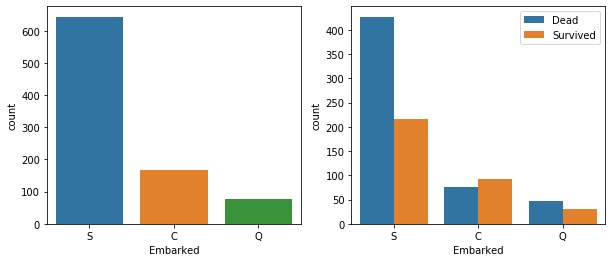

In [42]:
for col in cat:
    temp = df[col].dropna()
    fig, (ax0,ax1) = plt.subplots(ncols = 2, figsize = (10,4))
    sns.countplot(temp, ax = ax0)
    sns.countplot(temp, hue = 'Survived', data = df)
    handles, labels = ax1.get_legend_handles_labels()
    plt.legend(labels = ['Dead', 'Survived'])
    plt.show()

In [43]:
# df['FamilySize'] = df['SibSp'] + df['Parch'] +1
# df.FamilySize = df.FamilySize. dropna()
# sns.countplot('FamilySize', hue = 'Survived', data = df)
# plt.show()

## 3. Cleaning dataset

In [44]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [45]:
df['Age'] = df['Age'].fillna(value = df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(value = df['Embarked'].value_counts().index[0])


In [47]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [48]:
dftest.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [49]:
dftest['Age'] = dftest['Age'].fillna(value = df['Age'].mean())
dftest = dftest.dropna()

In [50]:
dftest.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [51]:
df2 = pd.read_csv('train.csv')
df2.duplicated().sum()

0

In [52]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## 4. Prepare train set and test set for training

In [53]:
# Create dummies
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
ohc = OneHotEncoder(handle_unknown='ignore')
#create dummies for columns 'Sex'
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex'])


# create dummies for dftest
le.fit(dftest['Sex'])
dftest['Sex'] = le.transform(dftest['Sex'])

In [54]:
#create dummies for columns 'Embarked'
le.fit(df['Embarked'])
embarked = le.transform(df['Embarked'])
ohc.fit(embarked.reshape(-1,1))
embarked = ohc.transform(embarked.reshape(-1,1)).toarray()
emb = pd.DataFrame(embarked, columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S'])


In [19]:
# 0: C, 1:Q, 2:S

In [55]:
df = df.drop('Embarked', axis = 1)
df = pd.concat([df, emb], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [56]:
#create dummies for 'Embarked' in dftest
le.fit(dftest['Embarked'])
embarked = le.transform(dftest['Embarked'])
ohc.fit(embarked.reshape(-1,1))
embarked = ohc.transform(embarked.reshape(-1,1)).toarray()
emb = pd.DataFrame(embarked, columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S'])

In [58]:
dftest = dftest.drop('Embarked', axis = 1)
dftest = pd.concat([dftest, emb], axis = 1)
dftest.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0
